# VAR
We will model our latent variables for observational unit $i$ for $t>1$ as

$$
z_{i,t} = Az_{i,t-1} +  \epsilon_{i,t}\\
||A||_2 < 1\\
\epsilon_{i,t} \sim N(0, I)\\
$$

initialization for $t=0$:

$$
z_{i, 1} \sim N(0, \Sigma_{z1})\\
\Sigma_{z1} = 
\begin{pmatrix}
    \sigma_{z1,1}^2&\\
    &\sigma_{z1,2}^2
\end{pmatrix}\\
\sigma_{z1,i}>0 \forall i
$$

We will design a network that generates a (num_batch, num_seq, num_features) where each serie follows a VAR as above.

## TODO:

* Write a proper test for forward backward identity

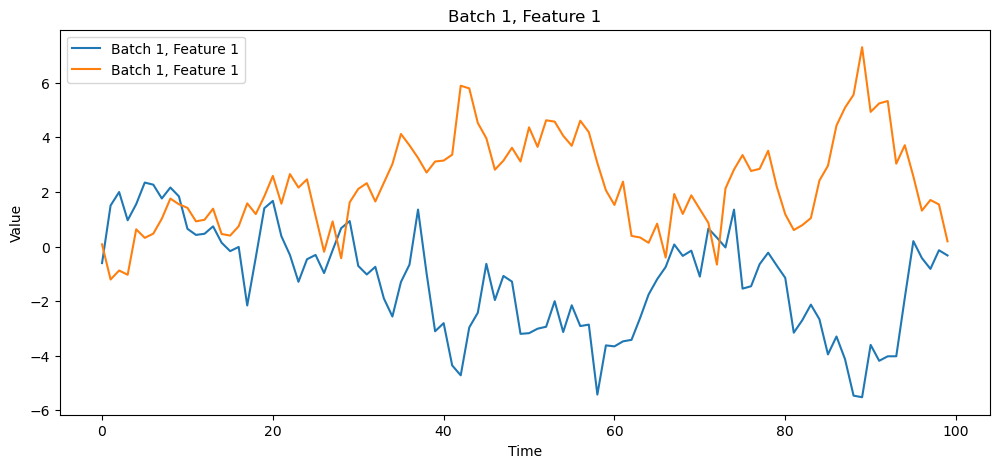

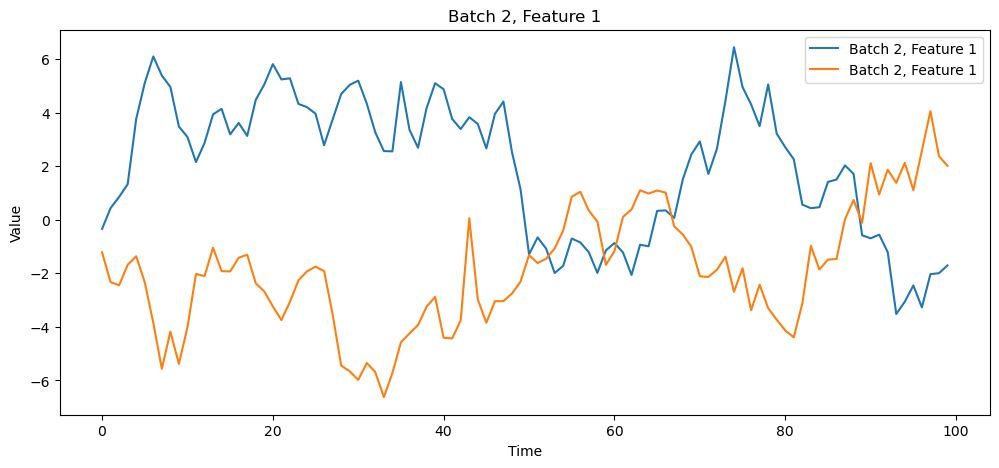

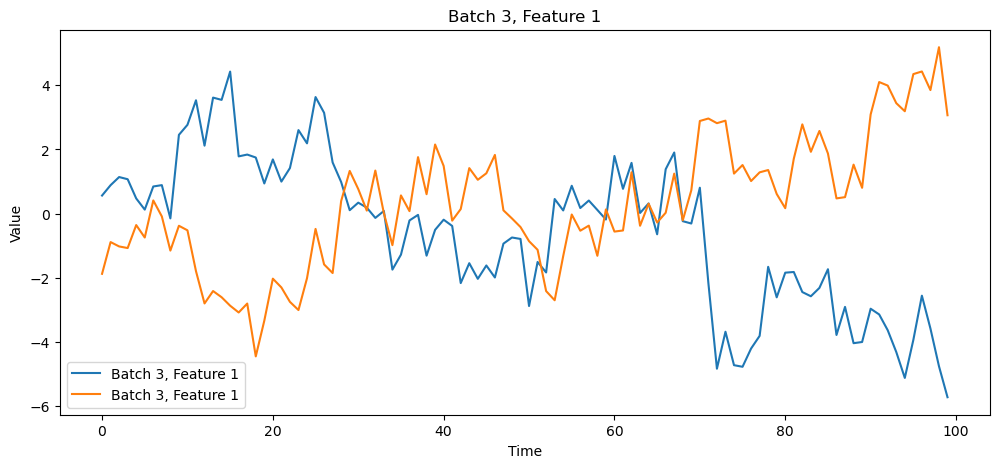

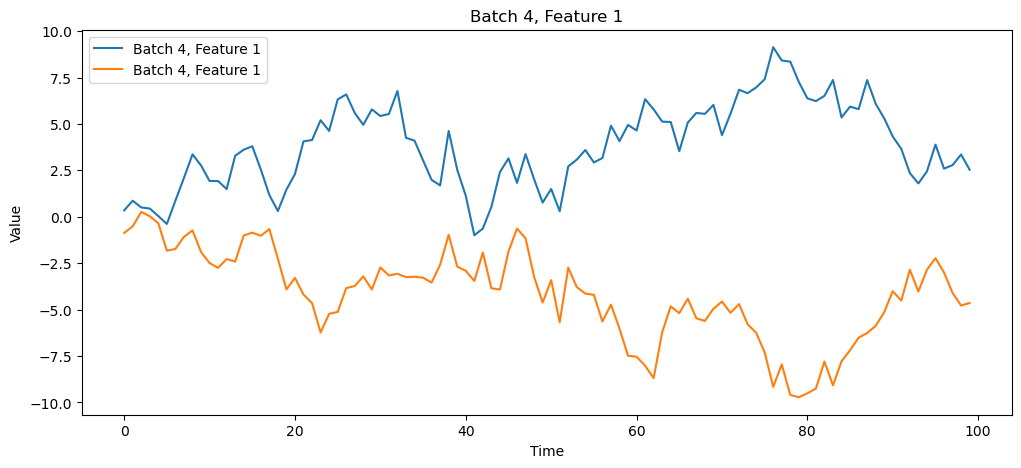

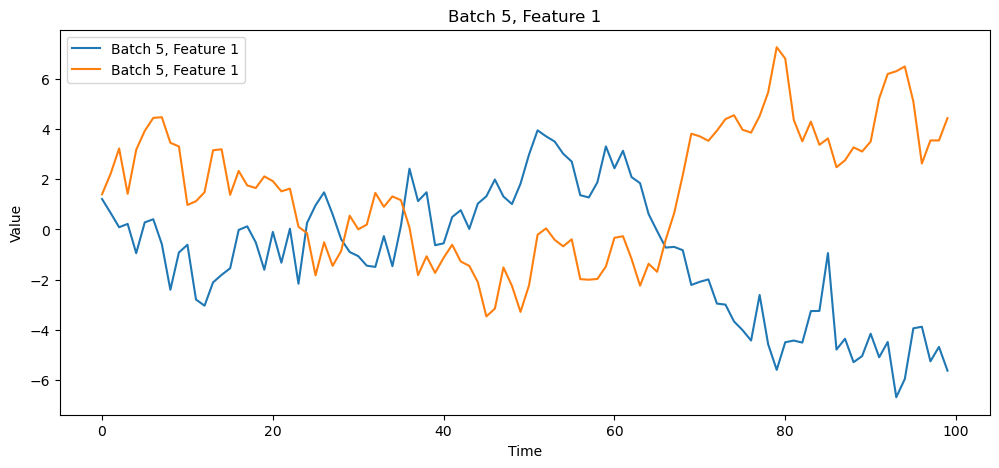

In [2]:
import torch
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import warnings
from VAR1 import VAR1


# Sample initialization
A = torch.tensor([[0.8, -0.2], 
                  [-0.2, 0.8]])

logvar_z1 = torch.log(torch.tensor([1.0, 1.0]))

# Create an instance of VAR1
model = VAR1(A, logvar_z1)

# Generate some sample data
num_batch = 5
seq_length = 100
num_features = 2

z, epsilon = model.sample(num_batch, seq_length)

# Plot the generated data
for i in range(num_batch):
    plt.figure(figsize=(12, 5))
    
    plt.plot(z[i, :].detach().numpy(), label=f"Batch {i+1}, Feature 1")
    plt.title(f"Batch {i+1}, Feature 1")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()


In [ ]:
def test_forward_backward_identity():
    # 1. Initialize the VAR1 model with some values.
    A = torch.tensor([[0.5, 0.2], [0.3, 0.7]])
    logvar_z1 = torch.log(torch.tensor([0.5, 0.5]))
    model = VAR1(A, logvar_z1)
    
    # 2. Randomly generate some shocks.
    num_batch = 10
    seq_length = 5
    epsilon_original = torch.randn((num_batch, seq_length, model.dim))
    
    # 3. Forward pass.
    z = model(epsilon_original)
    
    # 4. Backward pass.
    epsilon_recovered = model.backward(z)
    
    # 5. Assertion: Check if the recovered epsilon is close to the original epsilon.
    assert torch.allclose(epsilon_original, epsilon_recovered, atol=1e-5), "The forward and backward operations are not inverse of each other."

# This runs the test directly, but in practice, you would likely use pytest or a similar tool to run your tests.
test_forward_backward_identity()
